<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center><font size=5>Introduction to Neural Networks - Project Debrief </center></font></h1>

<center><img src="https://images.pexels.com/photos/730564/pexels-photo-730564.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="720"></center>

<center><font size=6> Bank Churn Prediction </font></center>

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Installing and Importing necessary libraries

In [56]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [57]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# to set the random seed for reproducible results
import random

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [58]:
# uncomment and run the following lines in case Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [59]:
ds = pd.read_csv("/content/Churn.csv")

In [60]:
data = ds.copy()

## Data Overview

### View the first and last 5 rows of the dataset.

In [61]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [63]:
ds.shape

(10000, 14)

* There are 10000 customer detailes with 14 attributes

### Check the data types of the columns for the dataset

In [64]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* As you can see, there are no null values in any of the column of this dataset

### Checking the Statistical Summary

In [65]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- Rownumber, CustomerId, and Surname are unique for each customer so they do not provide any value and need to be dropped.
- The median Age is 37 years old, the yougest 18 and oldest 92 years old.
- The median credit score is 652 close to the mean, which indicate a notmal distribution.
- The median balance is about 97k, max is about 250k
- Min Salary is 11k and max is about 199k

### Checking for Missing Values

In [66]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


* There are no null values in the data.

### Checking for unique values for each of the column

In [67]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


- We can drop the column - RowNumber, CustomerId as it is unique for each customer and will not add value to the model.
- We can also drop the surname of the customer, since it will add any value to the model.

In [68]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## <a name='link2'>Exploratory Data Analysis (EDA)</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

### Univariate Analysis

In [69]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [70]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

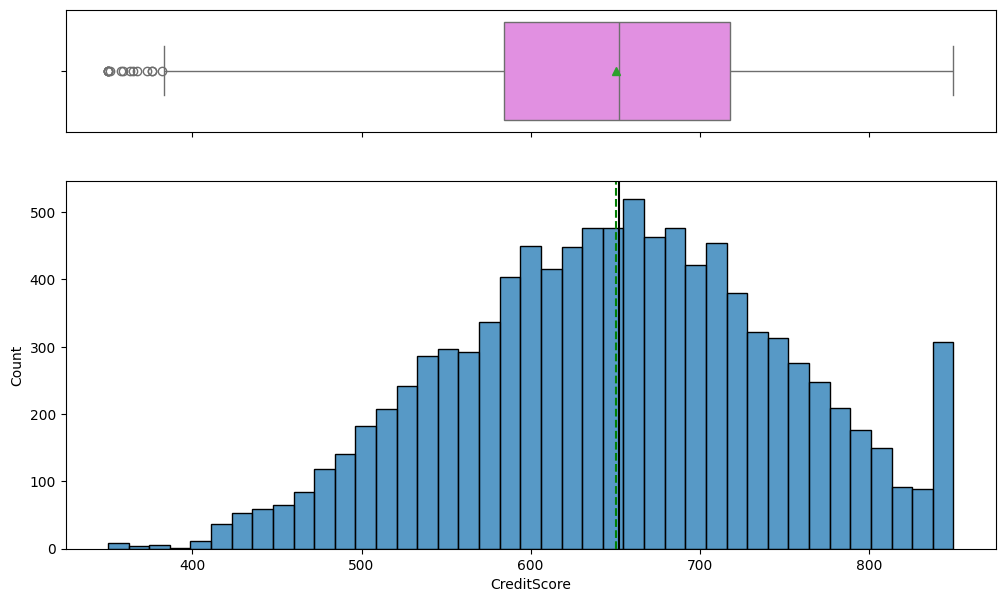

In [71]:
histogram_boxplot(ds,'CreditScore')

- Distribution is almost normal
- There are some outliers but still in the expected credit score range

#### Observations on Age

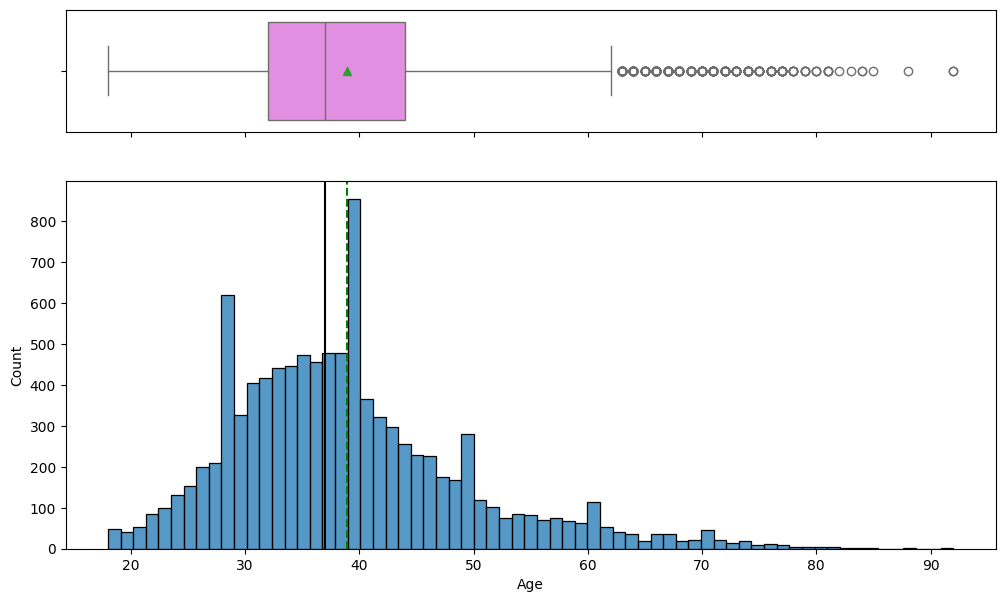

In [72]:
histogram_boxplot(ds,'Age')

- Distribution is right skewed
- There are some outliers in the right side, these are people elderly people.

#### Observations on Balance

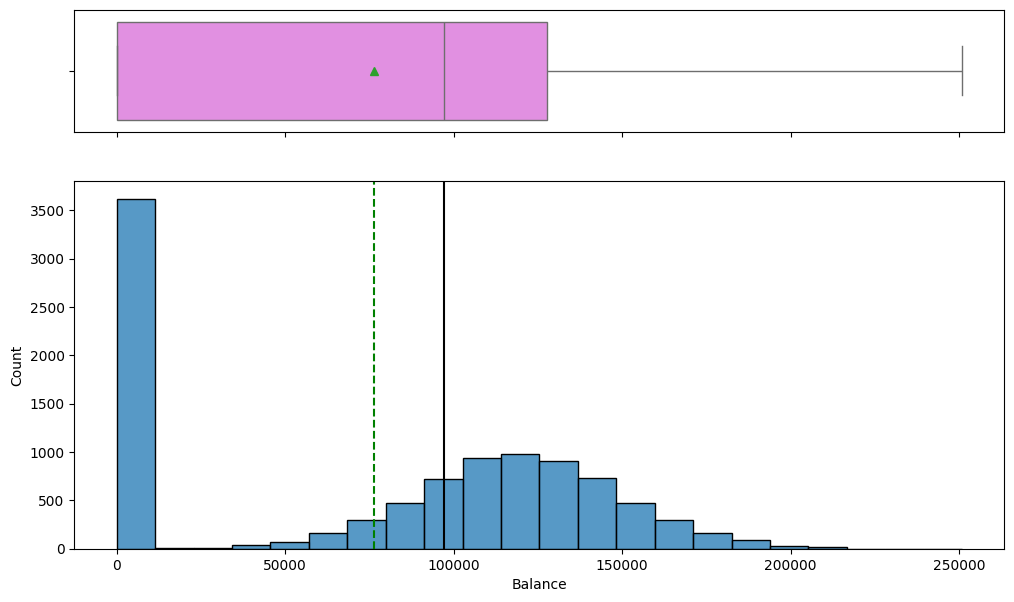

In [73]:
histogram_boxplot(ds,'Balance')

- Distribution is left skewed due to having a great number of customers with 0 balance. Otherwise the distribution would have been normal.
- There are no outliers.

#### Observations on Estimated Salary

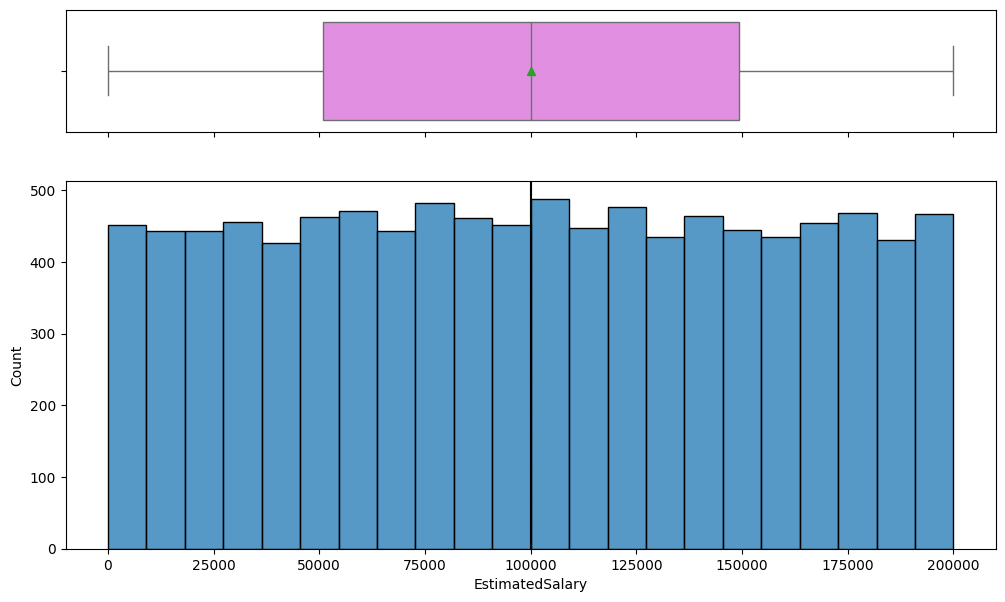

In [74]:
histogram_boxplot(ds,'EstimatedSalary')

- Distribution is normal
- No outliers

#### Observations on Exited

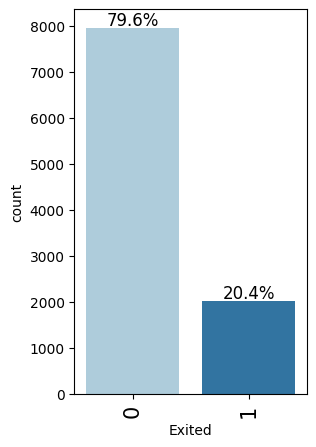

In [75]:
labeled_barplot(ds, "Exited", perc=True)

- Almost 80% of the observations are not Churn
- A little more than 20% are Churn
- The data is imbalance

### Bivariate Analysis

In [76]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [77]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

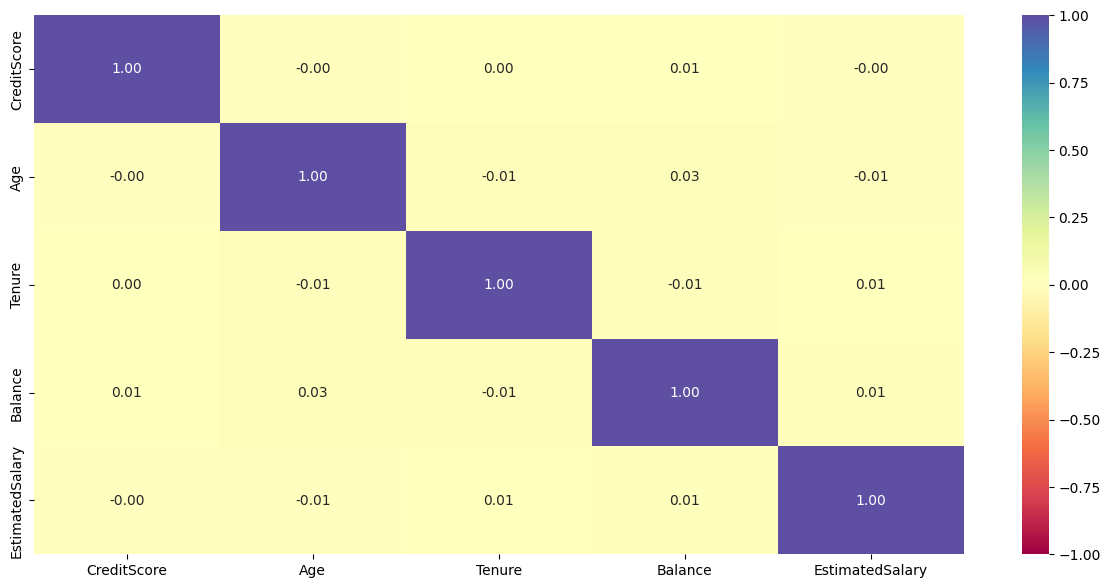

In [78]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* None of the columns are strongly corelated with each other. There is no multicollinearity.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


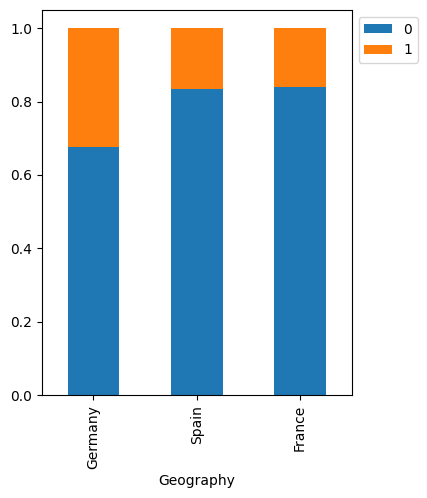

In [79]:
stacked_barplot(ds, "Geography", "Exited" )

- Majority of the customers are churned from the Germany.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


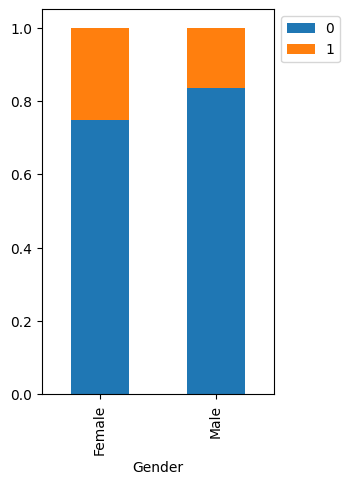

In [80]:
stacked_barplot(ds, "Gender", "Exited" )

- The proportion of female customers churning is greater than that of male customers.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


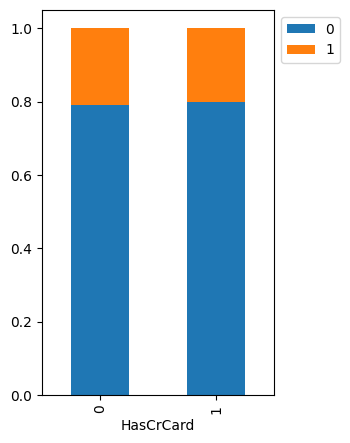

In [81]:
stacked_barplot(ds, "HasCrCard", "Exited" )

- No major difference both the categories

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


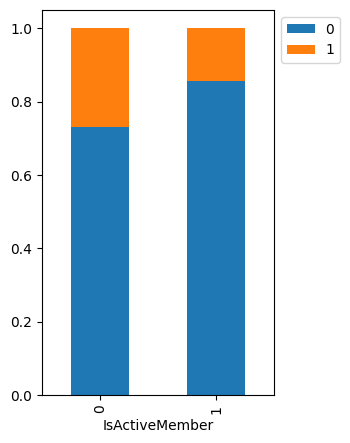

In [82]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

- Unsurprisingly the inactive members have a greater churn.

#### Exited Vs Credit Score

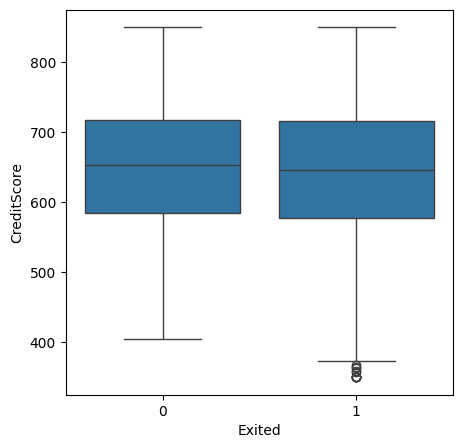

In [83]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

- There is no significant difference in the credit score distribution between retained and churned customers.

## Data Preprocessing

### Dummy Variable Creation

In [84]:
ds = pd.get_dummies(ds,
    columns=ds.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True
)

ds = ds.astype(float)

In [85]:
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [86]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [87]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y)

In [88]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.25, random_state = 42,stratify=y_large)

In [89]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [90]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [91]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Let's create a function for plotting the confusion matrix**



In [92]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [93]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [94]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [95]:
#Initializing the neural network
model_0 = Sequential()
#Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons with relu as activation functions
model_0.add(Dense(32,activation='relu'))
# Adding the output layer
model_0.add(Dense(1, activation = 'sigmoid'))
#Compiling the ANN with SGD optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
# Complining the model with binary cross entropy as loss function and accuracy as metrics
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[keras.metrics.Recall()])

In [96]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_0 = model_0.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=100,
    verbose=1
)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6309 - recall: 0.1294 - val_loss: 0.5833 - val_recall: 0.0000e+00
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5675 - recall: 0.0033 - val_loss: 0.5465 - val_recall: 0.0000e+00
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5328 - recall: 0.0000e+00 - val_loss: 0.5257 - val_recall: 0.0000e+00
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5127 - recall: 0.0000e+00 - val_loss: 0.5132 - val_recall: 0.0000e+00
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5002 - recall: 0.0000e+00 - val_loss: 0.5051 - val_recall: 0.0000e+00
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4918 - recall: 0.0000e+00 - val_loss: 0.4992 - val_recall: 0.0000e+00
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4857 - recall: 0.0000e+00 - val_loss: 0.4947 - val_recall: 0.0000e+00
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4809 - recall:

**Loss function**

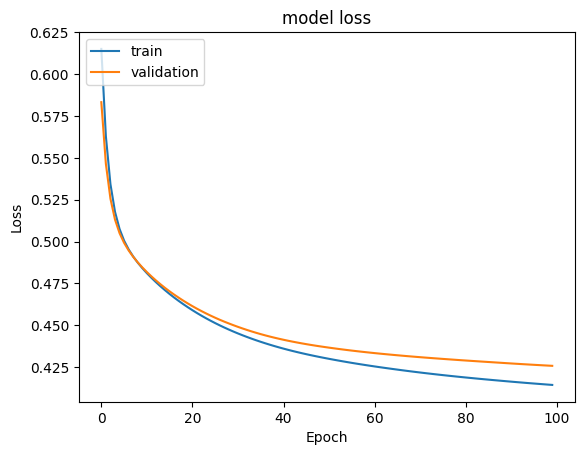

In [98]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

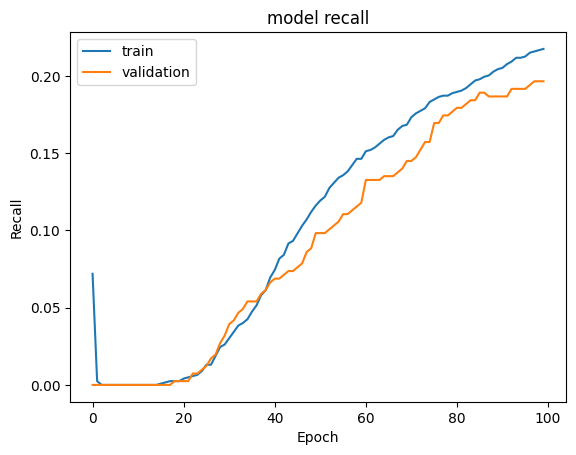

In [99]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [100]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [101]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [102]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [103]:
#lassification report
cr=classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      4777
         1.0       0.66      0.22      0.33      1223

    accuracy                           0.82      6000
   macro avg       0.74      0.60      0.61      6000
weighted avg       0.79      0.82      0.78      6000



In [104]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1593
         1.0       0.61      0.20      0.30       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



**Confusion matrix**

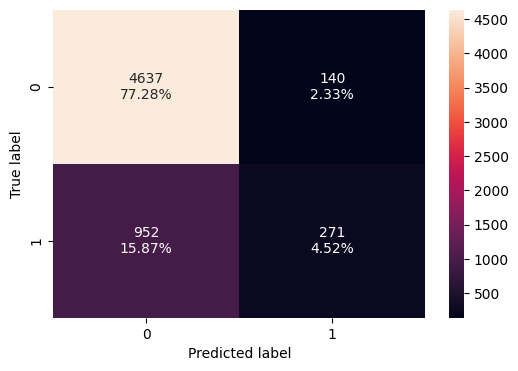

In [105]:
make_confusion_matrix(y_train, y_train_pred)

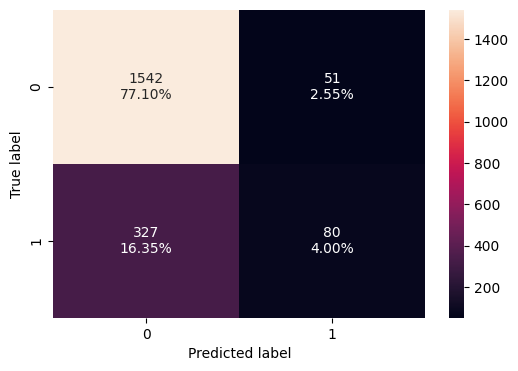

In [106]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [107]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [108]:
#Initializing the neural network
model_1 = Sequential()
#Adding the input layer with 64 neurons and relu as activation function
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons with relu as activation functions
model_1.add(Dense(32,activation='relu'))
# Adding the output layer
model_1.add(Dense(1, activation = 'sigmoid'))
#Compiling the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Complining the model with binary cross entropy as loss function and accuracy as metrics
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[keras.metrics.Recall()])

In [109]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=100,
    verbose=1
)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4928 - recall: 0.0482 - val_loss: 0.4252 - val_recall: 0.2088
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4017 - recall: 0.2285 - val_loss: 0.4140 - val_recall: 0.2776
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3882 - recall: 0.3005 - val_loss: 0.4057 - val_recall: 0.3292
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3774 - recall: 0.3369 - val_loss: 0.3980 - val_recall: 0.3489
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3673 - recall: 0.3601 - val_loss: 0.3914 - val_recall: 0.3538
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3584 - recall: 0.3724 - val_loss: 0.3857 - val_recall: 0.3710
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3507 - recall: 0.3849 - val_loss: 0.3805 - val_recall: 0.3857
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3436 - recall: 0.3984 - val_loss: 0.3752 - val_recall: 0.3907


**Loss function**

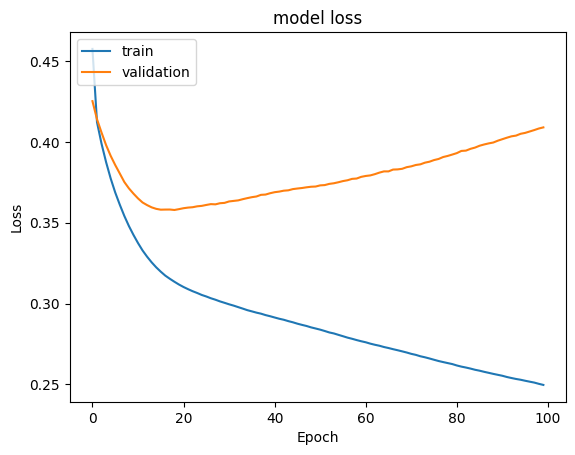

In [111]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

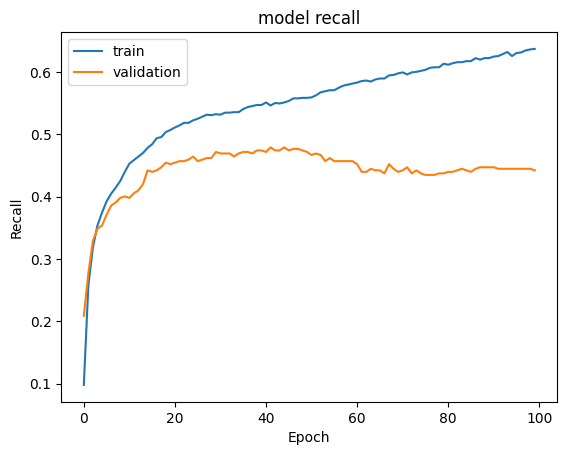

In [112]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [113]:
#Predicting the results using 0.5 as the threshold
y_train_pred=model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [114]:
#Predicting the results using 0.5 as the threshold
y_val_pred=model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [115]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [116]:
#classification report
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      4777
         1.0       0.86      0.61      0.72      1223

    accuracy                           0.90      6000
   macro avg       0.88      0.79      0.83      6000
weighted avg       0.90      0.90      0.89      6000



In [117]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1593
         1.0       0.66      0.44      0.53       407

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



**Confusion matrix**

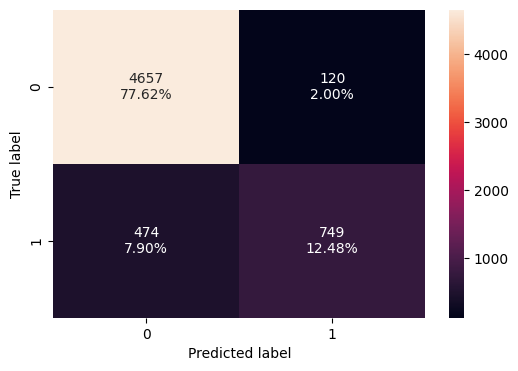

In [118]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

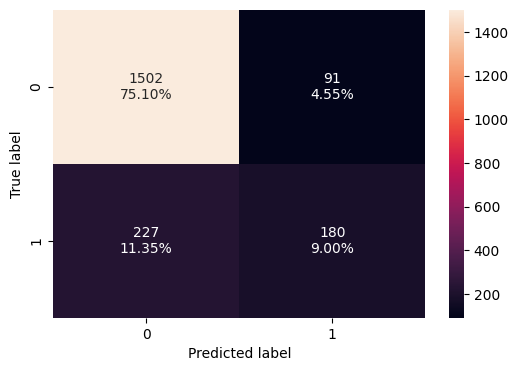

In [119]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [120]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [121]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Adding dropout with ratio of 0.2
model_2.add(Dropout(0.2))
# Adding the first hidden layer with 16 neurons with relu as activation functions
model_2.add(Dense(32,activation='relu'))
model_2.add(Dense(16,activation='relu'))
model_2.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_2.add(Dense(8,activation='relu'))
# Adding the output layer
model_2.add(Dense(1, activation = 'sigmoid'))

In [122]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,113 (8.25 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
#Compiling the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Compiling the model with binary cross entropy as loss function and accuracy as metrics

model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[keras.metrics.Recall()])

In [124]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5460 - recall: 0.0856 - val_loss: 0.4432 - val_recall: 0.0025
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4359 - recall: 0.0395 - val_loss: 0.4337 - val_recall: 0.1351
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4309 - recall: 0.1005 - val_loss: 0.4305 - val_recall: 0.1499
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4203 - recall: 0.1550 - val_loss: 0.4260 - val_recall: 0.1794
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4163 - recall: 0.1608 - val_loss: 0.4204 - val_recall: 0.2383
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4102 - recall: 0.2202 - val_loss: 0.4134 - val_recall: 0.2899
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4076 - recall: 0.2291 - val_loss: 0.4094 - val_recall: 0.3120
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3964 - recall: 0.2659 - val_loss: 0.4070 - val_recall: 0.3047


**Loss function**

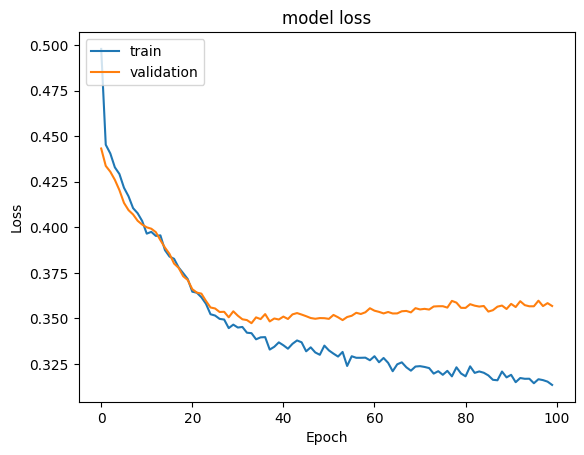

In [125]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

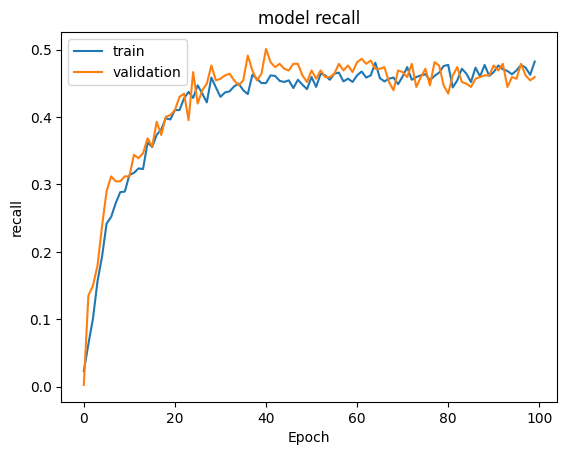

In [126]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [127]:
#Predicting the results using 0.5 as the threshold
y_train_pred=model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [128]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [129]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [130]:
#classification report
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      4777
         1.0       0.83      0.51      0.63      1223

    accuracy                           0.88      6000
   macro avg       0.86      0.74      0.78      6000
weighted avg       0.87      0.88      0.87      6000



In [131]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1593
         1.0       0.75      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



**Confusion matrix**

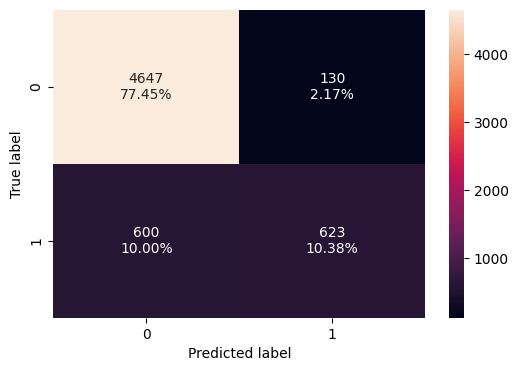

In [132]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

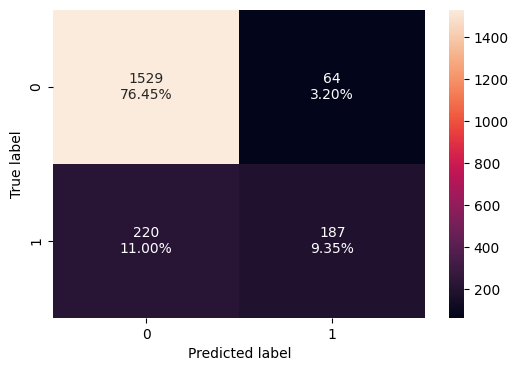

In [133]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [134]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9554, 11)
After UpSampling, the shape of train_y: (9554,) 



Let's build a model with the balanced dataset

In [135]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [136]:
#Initializing the model
model_3 = Sequential()
# Adding input layer of 32 neurons with relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Adding hidden layer with 16 neurons with relu as activation function
model_3.add(Dense(16,activation='relu'))
# Adding hidden layer with 8 neurons with relu as activation function
model_3.add(Dense(8,activation='relu'))
# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [137]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
# Initializing Adam optimizer
optimizer = tf.keras.optimizers.SGD(0.001)
# Complining the model with binary cross entropy as loss and accuracy as metrics
model_3.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = [keras.metrics.Recall()])
# Fitting the model on train and test with batch_size of 64, epochs of 100
history_3 = model_3.fit(X_train_smote,y_train_smote,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val))

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7048 - recall: 0.9446 - val_loss: 0.7399 - val_recall: 0.9287
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7028 - recall: 0.9415 - val_loss: 0.7344 - val_recall: 0.9189
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7010 - recall: 0.9379 - val_loss: 0.7294 - val_recall: 0.9140
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6993 - recall: 0.9325 - val_loss: 0.7248 - val_recall: 0.9115
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6978 - recall: 0.9242 - val_loss: 0.7206 - val_recall: 0.8968
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6964 - recall: 0.9138 - val_loss: 0.7166 - val_recall: 0.8919
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6950 - recall: 0.9035 - val_loss: 0.7126 - val_recall: 0.8771
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6936 - recall: 0.8860 - val_loss: 0.7086 - val_recall: 0.8673


**Loss function**

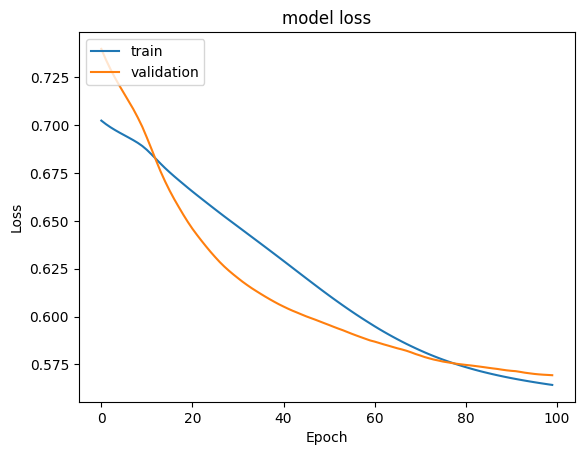

In [139]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

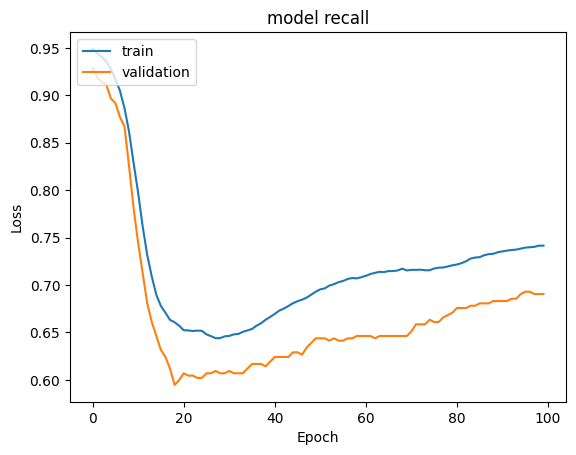

In [140]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [141]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold.
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [142]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [143]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [144]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      4777
         1.0       0.72      0.74      0.73      4777

    accuracy                           0.73      9554
   macro avg       0.73      0.73      0.73      9554
weighted avg       0.73      0.73      0.73      9554



In [145]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1593
         1.0       0.38      0.69      0.49       407

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.80      0.71      0.74      2000



**Confusion matrix**

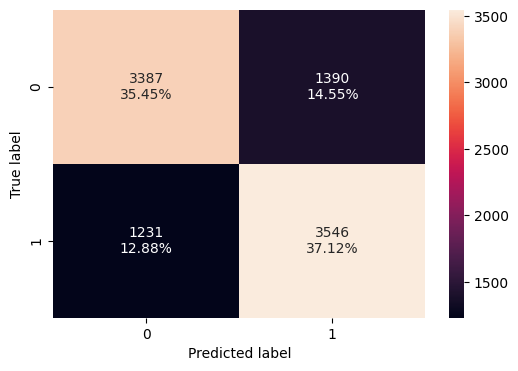

In [146]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

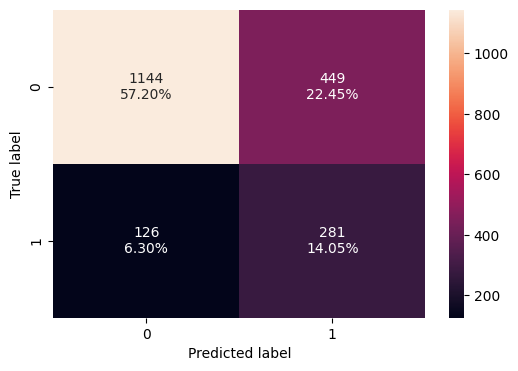

In [147]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [148]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [149]:
#Initializing the model
model_4 = Sequential()
# Adding input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))
# Adding hidden layer with 8 neurons with relu as activation function
model_4.add(Dense(8,activation='relu'))
# Adding the output layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [150]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = [keras.metrics.Recall()])
# Fitting the model on train and test with batch_size of 64, epochs of 100
history_4 = model_4.fit(X_train_smote,y_train_smote,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val))

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6625 - recall: 0.7415 - val_loss: 0.5962 - val_recall: 0.7322
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5599 - recall: 0.7518 - val_loss: 0.5863 - val_recall: 0.7346
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5430 - recall: 0.7590 - val_loss: 0.5793 - val_recall: 0.7297
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5313 - recall: 0.7644 - val_loss: 0.5799 - val_recall: 0.7518
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5168 - recall: 0.7773 - val_loss: 0.5663 - val_recall: 0.7690
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4974 - recall: 0.7846 - val_loss: 0.5563 - val_recall: 0.7961
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4800 - recall: 0.7965 - val_loss: 0.5480 - val_recall: 0.8108
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4670 - recall: 0.8029 - val_loss: 0.5402 - val_recall: 0.8133


**Loss function**

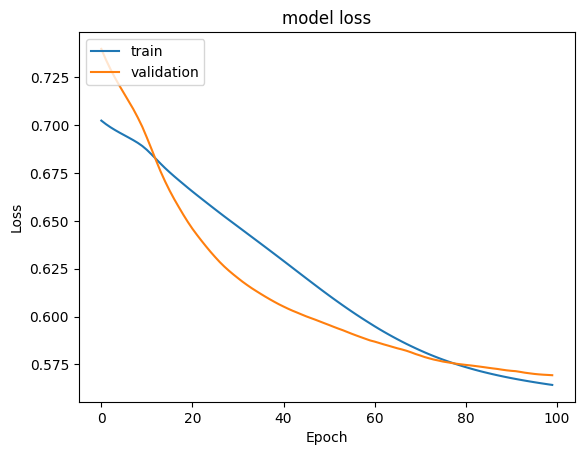

In [152]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

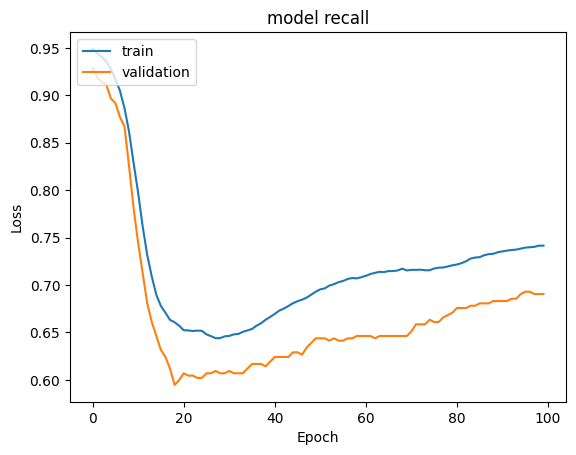

In [153]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [154]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold.
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [155]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as thr threshold.
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [156]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [157]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      4777
         1.0       0.81      0.90      0.86      4777

    accuracy                           0.85      9554
   macro avg       0.85      0.85      0.85      9554
weighted avg       0.85      0.85      0.85      9554



In [158]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      1593
         1.0       0.46      0.74      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.77      0.78      2000



**Confusion matrix**

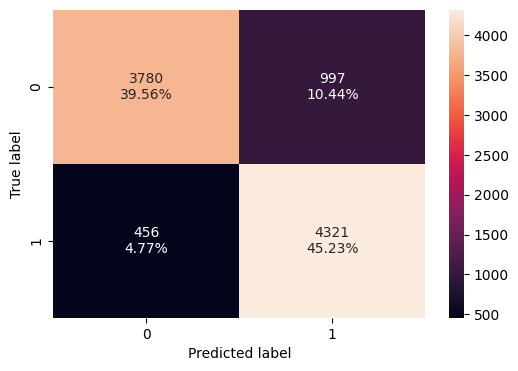

In [159]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

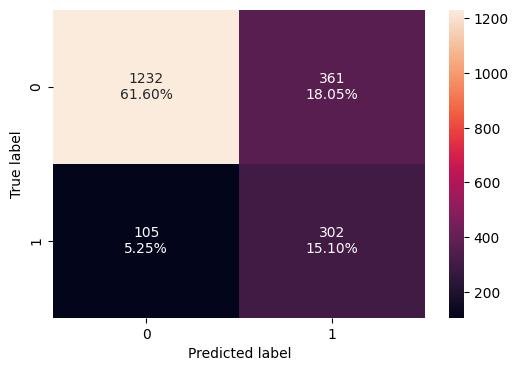

In [160]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [161]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [162]:
#Initializing the model
model_5 = Sequential()
# Adding input layer of 32 neurons with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# Adding the dropout
model_5.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_5.add(Dense(16,activation='relu'))
# Adding the dropout
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Adding the output layer
model_5.add(Dense(1, activation = 'sigmoid'))

In [163]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Complining the model with binary cross entropy as loss and accuracy as metrics
model_5.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = [keras.metrics.Recall()])
# Fitting the model on train and test with batch_size of 64, epochs of 100
history_5 = model_5.fit(X_train_smote,y_train_smote,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val))

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6494 - recall: 0.5725 - val_loss: 0.5941 - val_recall: 0.6880
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5811 - recall: 0.7294 - val_loss: 0.5707 - val_recall: 0.6855
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5636 - recall: 0.7311 - val_loss: 0.5584 - val_recall: 0.6806
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5570 - recall: 0.7384 - val_loss: 0.5533 - val_recall: 0.6953
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5450 - recall: 0.7463 - val_loss: 0.5536 - val_recall: 0.7002
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5356 - recall: 0.7530 - val_loss: 0.5378 - val_recall: 0.6953
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5307 - recall: 0.7380 - val_loss: 0.5331 - val_recall: 0.6830
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5201 - recall: 0.7553 - val_loss: 0.5314 - val_recall: 0.7027


**Loss function**

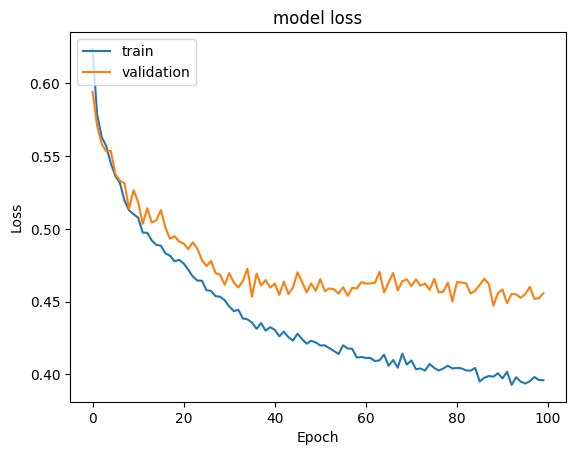

In [165]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

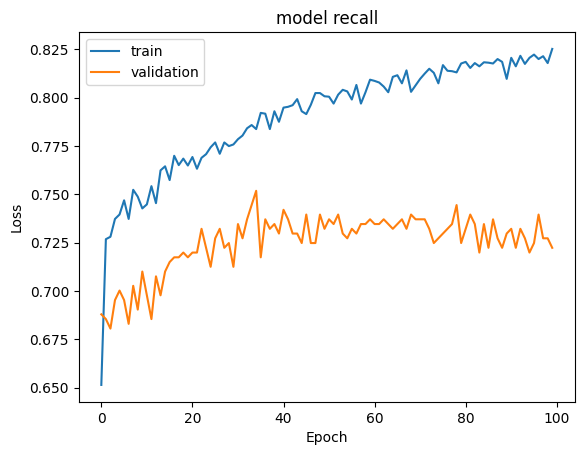

In [166]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [167]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [168]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold.
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [169]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [170]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      4777
         1.0       0.83      0.85      0.84      4777

    accuracy                           0.84      9554
   macro avg       0.84      0.84      0.84      9554
weighted avg       0.84      0.84      0.84      9554



In [171]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      1593
         1.0       0.49      0.72      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.83      0.79      0.81      2000



**Confusion matrix**

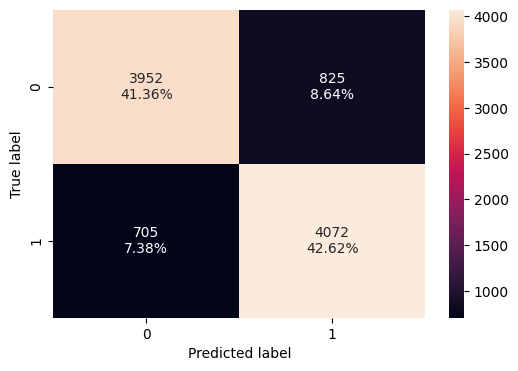

In [172]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

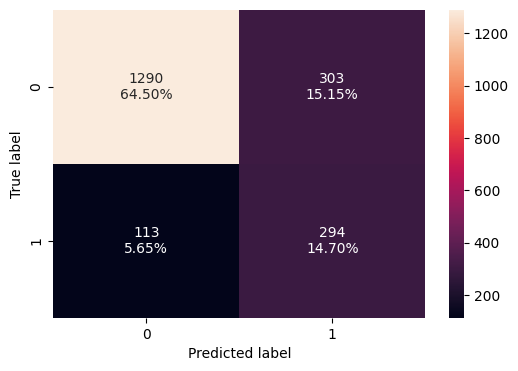

In [173]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Comparison and Final Model Selection

In [174]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.221586
NN with Adam,0.612428
NN with Adam & Dropout,0.509403
NN with SMOTE & SGD,0.742307
NN with SMOTE & Adam,0.904543
"NN with SMOTE,Adam & Dropout",0.852418


In [175]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.196560
NN with Adam,0.442260
NN with Adam & Dropout,0.459459
NN with SMOTE & SGD,0.690418
NN with SMOTE & Adam,0.742015
"NN with SMOTE,Adam & Dropout",0.722359


In [176]:
train_metric_df-valid_metric_df

,recall
NN with SGD,0.025026
NN with Adam,0.170168
NN with Adam & Dropout,0.049944
NN with SMOTE & SGD,0.051889
NN with SMOTE & Adam,0.162528
"NN with SMOTE,Adam & Dropout",0.130059


- **Observation**: The recall score difference between the train and validation sets is notably lower for the NN with SMOTE,Adam and Dropout and also has a higher train and test score.

- **Conclusion**: Hence, we select this model as the best option since a lower difference suggests improved consistency and generalization across both training and validation datasets.

In [177]:
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [178]:
#lets print classification report
cr=classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      1593
         1.0       0.48      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



The model achieved a recall of 71% on class 1, i.e., the model can correctly recall 71% of all customers who churned.

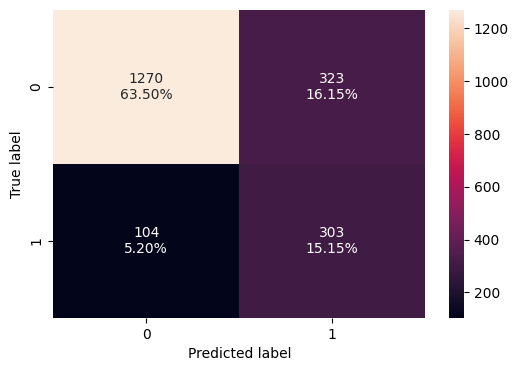

In [179]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review its target market or review the strategy for retention between the different age groups.

* About the tenure, the clients on either end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure. Worryingly, the bank is losing customers with significant bank balances which are likely to hit their available capital for lending.

* The proportion of female customers churning is also greater than that of male customers.
Interestingly, the majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.


* Unsurprisingly the inactive members have a greater churn.
Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group into active customers as this will have a positive impact on the customer churn.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Observations on Geography

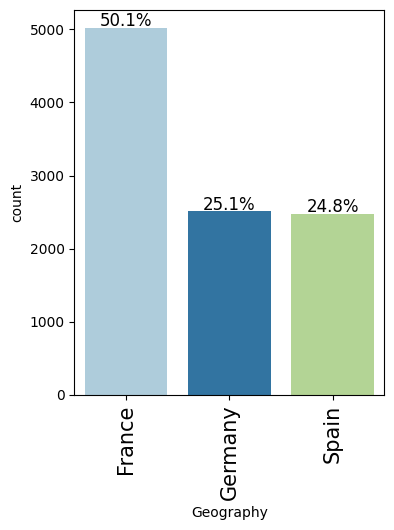

In [180]:
labeled_barplot(data, "Geography", perc=True)

- France has the most observations
- Germany and Spain are almost the same

#### Observations on Gender

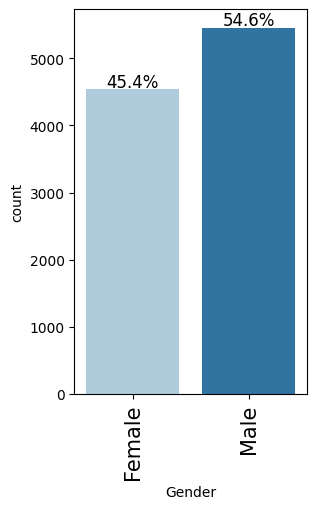

In [181]:
labeled_barplot(data, "Gender", perc=True)

- There are more male than female customers.

#### Observations on Tenure

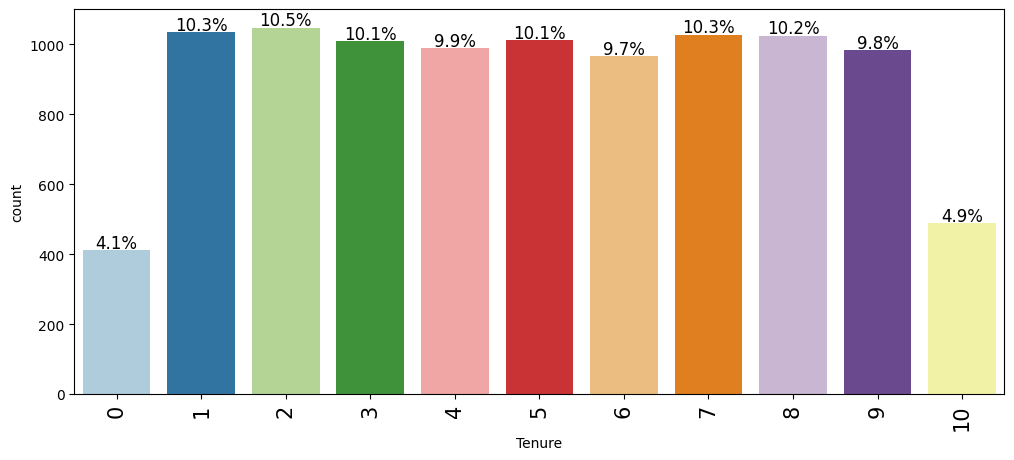

In [182]:
labeled_barplot(data, "Tenure", perc=True)

- Tenures 0 and 10 are almost the same and the lowest of all at around 4.5 average.
- Tenures 1 to 9 are almost the same at 10.2 average

#### Observations on Number of Products

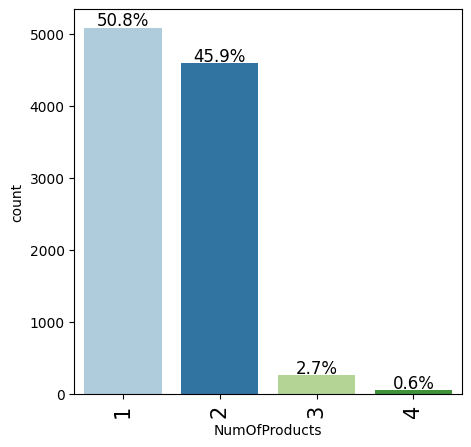

In [183]:
labeled_barplot(data, "NumOfProducts", perc=True)

- Most Customers have 1 product at 50.8%
- 96.7% of customers have 1 to 2 products.
- Very few customers have more than 2 products (3.3%)

#### Observations on Has Credit Card

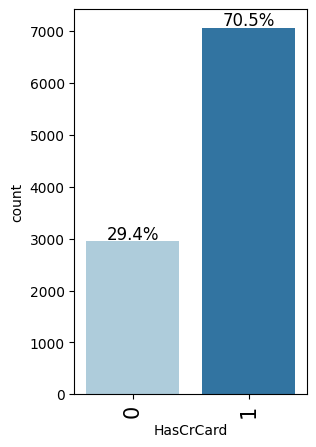

In [184]:
labeled_barplot(data, "HasCrCard", perc=True)

- 70.5% have a credit card

#### Observations on Is Active Member

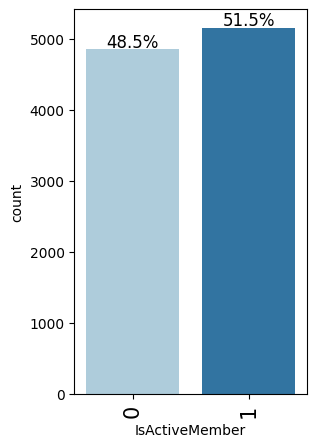

In [185]:
labeled_barplot(data, "IsActiveMember", perc=True)

- There are more active than inactive members at 51.5%

### Bivariate Analysis

#### Exited Vs Age

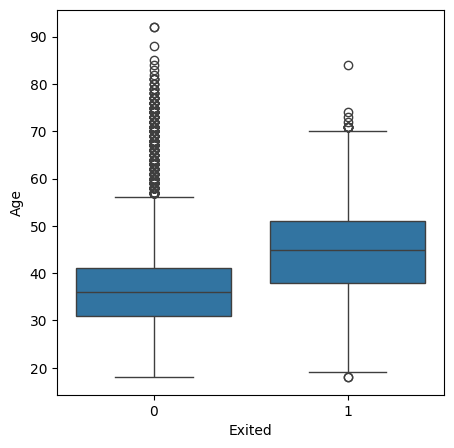

In [186]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=data)
plt.show()

- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories.

#### Exited Vs Tenure

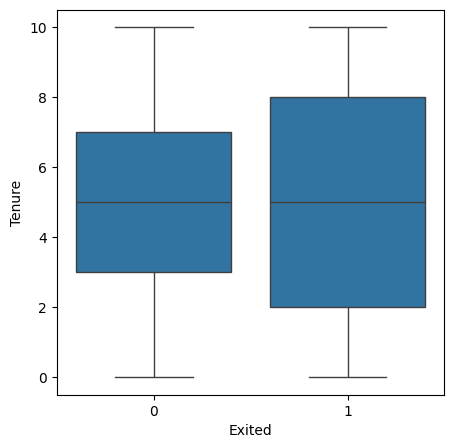

In [187]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=data)
plt.show()

- Although the median Tenure for churn and not churn is the same, there are more churn people with a greater range of Tenure.

#### Exited Vs Balance

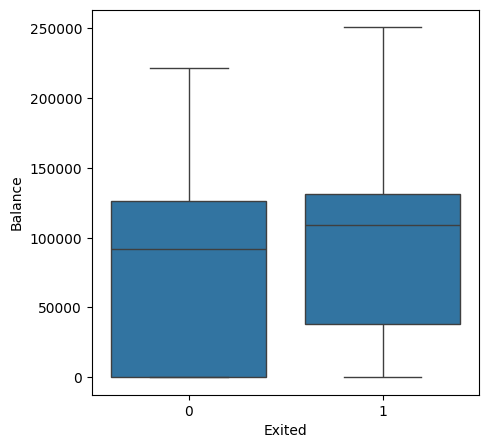

In [188]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()

- Worryingly, the bank is losing customers with significant bank balances which are likely to hit their available capital for lending.

#### Exited Vs Number of Products

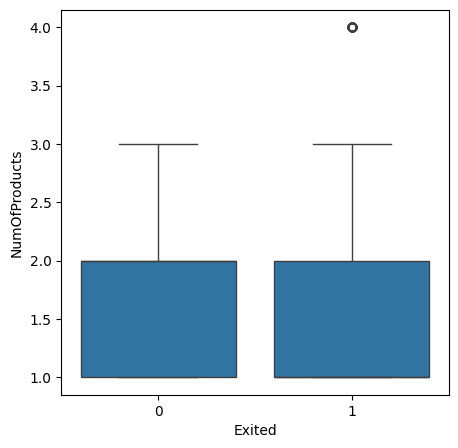

In [189]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=data)
plt.show()

- Number of products does not appear to have any effect on churn or not churn customers. Data seems the same for both groups.

#### Exited Vs Estimated Salary

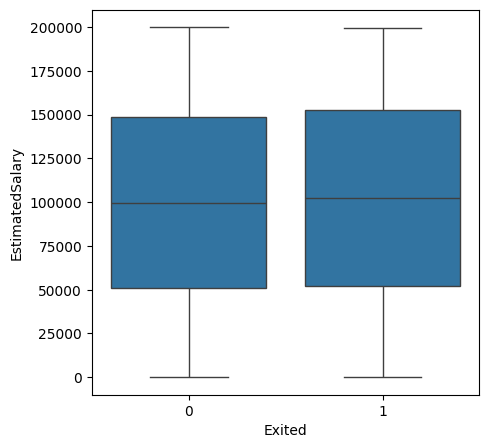

In [190]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()

- Estimated Salary does not seem to have an effect on churn or not churn customers since both groups seem identical.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

<font size=6 color='blue'>Power Ahead</font>
___